# Data Visualization Part 2

   The goal of this notebook is to do final processing on the features added to original dataset as well as creating visualizations relating to the features working with the different parts of a URl. Reference back to "data_loading" for more information.
    
   Looking into the features: protocol, www_present, sub_domain, domain, top_domain, dir, file, path, fragment, query, and status

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("parsed_url_features.csv")
df

,Unnamed: 0,url,protocol,www_present,sub_domain,domain,top_domain,dir,file,path,...,n_hyphens,n_underscore,n_slash,n_questionmrk,n_equals,n_at,n_and,n_exclamation,url_length,domain_name_correct
0,11,https://ghfdc.knuodwq.cn/,https,NaN,ghfdc,knuodwq,cn,NaN,NaN,/,...,0,0,3,0,0,0,0,0,25,1
1,12,https://rakutenluyaw.ouxawer-p.net/,https,NaN,rakutenluyaw,ouxawer-p,net,NaN,NaN,/,...,1,0,3,0,0,0,0,0,35,1
2,13,pulsagratiss-1010.000webhostapp.com,NaN,NaN,pulsagratiss-1010,000webhostapp,com,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,35,1
3,14,idjvn.com,NaN,NaN,NaN,idjvn,com,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,9,0
4,15,http://www.vmveg.com//vendor/phpunit/phpunit/s...,http,www,www.,vmveg,com,NaN,/vendor/phpunit/phpunit/src/Util/PHP/redirect.php,//vendor/phpunit/phpunit/src/Util/PHP/redirect...,...,0,0,10,1,0,0,0,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,100006,interceder.net/topic/Guy-Turcotte,NaN,NaN,NaN,interceder,net,/topic/,Guy-Turcotte,/topic/Guy-Turcotte,...,1,0,2,0,0,0,0,0,33,1
99996,100007,ifes.org/Divisions/List-Projects.aspx,NaN,NaN,NaN,ifes,org,/Divisions/,List-Projects.aspx,/Divisions/List-Projects.aspx,...,1,0,2,0,0,0,0,0,37,0
99997,100008,en.wikipedia.org/wiki/Jeffrey_Lynn,NaN,NaN,en,wikipedia,org,/wiki/,Jeffrey_Lynn,/wiki/Jeffrey_Lynn,...,0,1,2,0,0,0,0,0,34,1
99998,100009,ccdowney.com/bible-college/,NaN,NaN,NaN,ccdowney,com,/bible-college/,NaN,/bible-college/,...,1,0,2,0,0,0,0,0,27,1


<Axes: xlabel='status', ylabel='count'>

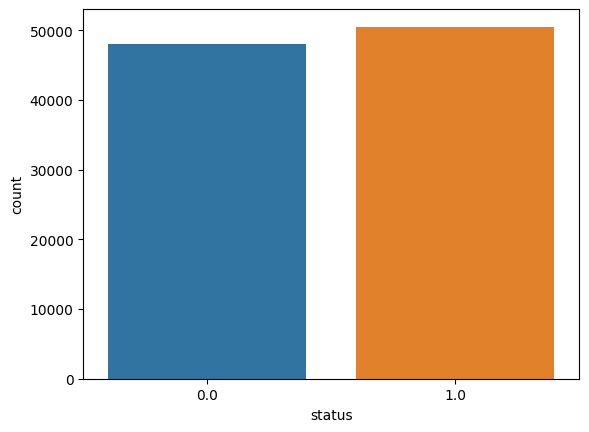

In [3]:
sns.countplot(x=df["status"], data=df)

In [4]:
# do a heatmap with protocol and status
legit_df = df['status'] == 1
phish_df = df['status'] == 0
http_df = df['protocol'] == "http"
none_protocol_df = df['protocol'] == "nan"
https_df = df['protocol'] == "https"
ttps_df = df['protocol'] == "ttps"
df_only_phish = df[~legit_df]
df_only_legit = df[~phish_df]

legit_http_df = len(df_only_legit[~none_protocol_df & ~https_df & ~ttps_df])
legit_nan_df = len(df_only_legit[~http_df & ~https_df & ~ttps_df])
legit_https_df = len(df_only_legit[~none_protocol_df & ~http_df & ~ttps_df])
legit_ttps_df = len(df_only_legit[~none_protocol_df & ~https_df & ~http_df])
legit = [legit_http_df/85_154, legit_nan_df/75_191, legit_https_df/91_463, legit_ttps_df/75_193]

phish_http_df = len(df_only_phish[~none_protocol_df & ~https_df & ~ttps_df])
phish_nan_df = len(df_only_phish[~http_df & ~https_df & ~ttps_df])
phish_https_df = len(df_only_phish[~none_protocol_df & ~http_df & ~ttps_df])
phish_ttps_df = len(df_only_phish[~none_protocol_df & ~https_df & ~http_df])
phish = [phish_http_df/85_154, phish_nan_df/75_191, phish_https_df/91_463, phish_ttps_df/75_193]

print(phish_nan_df)
print(legit_nan_df)

heatmap_dataset = pd.DataFrame(np.array([phish, legit]), columns=df["protocol"].unique(), index=[0, 1])
heatmap_dataset.head()
# do a heatmap with www_present and status
# do a heatmap with domain_name_correct and status


27301
47890


/tmp/ipykernel_2843279/819129284.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_http_df = len(df_only_legit[~none_protocol_df & ~https_df & ~ttps_df])
/tmp/ipykernel_2843279/819129284.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_nan_df = len(df_only_legit[~http_df & ~https_df & ~ttps_df])
/tmp/ipykernel_2843279/819129284.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_https_df = len(df_only_legit[~none_protocol_df & ~http_df & ~ttps_df])
/tmp/ipykernel_2843279/819129284.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_ttps_df = len(df_only_legit[~none_protocol_df & ~https_df & ~http_df])
/tmp/ipykernel_2843279/819129284.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_http_df = len(df_only_phish[~none_protocol_df & ~https_df & ~ttps_df])
/tmp/ipykernel_2843279/819129284.py

,https,NaN,http,ttps
0,0.409317,0.363089,0.458459,0.363106
1,0.590683,0.636911,0.541541,0.636894


Text(0.5, 23.52222222222222, 'Protocol')

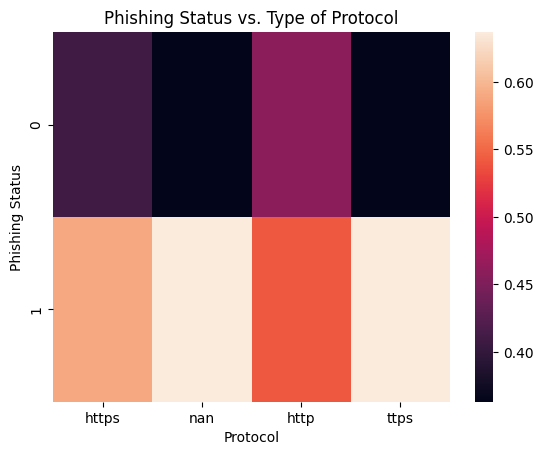

In [5]:
ax = plt.axes()
sns.heatmap(heatmap_dataset, ax=ax).set(title='Phishing Status vs. Type of Protocol')
ax.set_ylabel("Phishing Status")
ax.set_xlabel("Protocol")

In [6]:
df["www_present"].unique()

array([nan, 'www'], dtype=object)

In [7]:
# do a heatmap with www_present and status
legit_df = df['status'] == 1
phish_df = df['status'] == 0
www_df = df['www_present'] == "www"
none_www_df = df['www_present'] == "nan"
df_only_phish = df[~legit_df]
df_only_legit = df[~phish_df]

legit_www_df = len(df_only_legit[~none_www_df])
legit_nan_df = len(df_only_legit[~www_df])
legit = [legit_www_df/101_428, legit_nan_df/87_904]

phish_www_df = len(df_only_phish[~none_www_df])
phish_nan_df = len(df_only_phish[~www_df])
phish = [phish_www_df/101_428, phish_nan_df/87_904]

print(legit_nan_df)
print(phish_nan_df)

heatmap_dataset1 = pd.DataFrame(np.array([phish, legit]), columns=df["www_present"].unique(), index=[0, 1])
heatmap_dataset.head()
# do a heatmap with www_present and status
# do a heatmap with domain_name_correct and status

45951
41953


/tmp/ipykernel_2843279/3508457179.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_www_df = len(df_only_legit[~none_www_df])
/tmp/ipykernel_2843279/3508457179.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_nan_df = len(df_only_legit[~www_df])
/tmp/ipykernel_2843279/3508457179.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_www_df = len(df_only_phish[~none_www_df])
/tmp/ipykernel_2843279/3508457179.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_nan_df = len(df_only_phish[~www_df])


,https,NaN,http,ttps
0,0.409317,0.363089,0.458459,0.363106
1,0.590683,0.636911,0.541541,0.636894


Text(0.5, 23.52222222222222, 'Protocol')

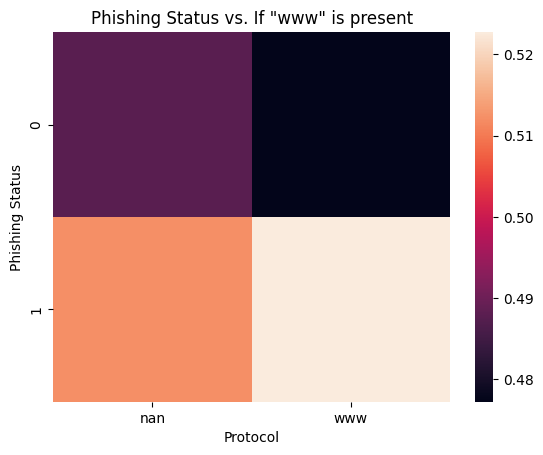

In [8]:
ax = plt.axes()
sns.heatmap(heatmap_dataset1, ax=ax).set(title='Phishing Status vs. If "www" is present')
ax.set_ylabel("Phishing Status")
ax.set_xlabel("Protocol")

In [9]:
df["domain_name_correct"].unique()

array([1, 0])

In [10]:
# do a heatmap with domain_name_correct and status
# do a heatmap with www_present and status
legit_df = df['status'] == 1
phish_df = df['status'] == 0
good_spell_domain = df['domain_name_correct'] == 1
bad_spell_domain = df['domain_name_correct'] == 0
df_only_phish = df[~legit_df]
df_only_legit = df[~phish_df]

legit_good_df = len(df_only_legit[~bad_spell_domain])
legit_bad_df = len(df_only_legit[~good_spell_domain])
legit = [legit_good_df/74_931, legit_bad_df/26_497]

phish_good_df = len(df_only_phish[~bad_spell_domain])
phish_bad_df = len(df_only_phish[~good_spell_domain])
phish = [phish_good_df/74_931, phish_bad_df/26_497]

print(legit_bad_df)
print(phish_bad_df)

heatmap_dataset2 = pd.DataFrame(np.array([phish, legit]), columns=df["domain_name_correct"].unique(), index=[0, 1])
heatmap_dataset2.head()

11686
14811


/tmp/ipykernel_2843279/235585999.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_good_df = len(df_only_legit[~bad_spell_domain])
/tmp/ipykernel_2843279/235585999.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_bad_df = len(df_only_legit[~good_spell_domain])
/tmp/ipykernel_2843279/235585999.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_good_df = len(df_only_phish[~bad_spell_domain])
/tmp/ipykernel_2843279/235585999.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_bad_df = len(df_only_phish[~good_spell_domain])


,1,0
0,0.462786,0.558969
1,0.537214,0.441031


Text(0.5, 23.52222222222222, 'Domain Name Spelled Correct')

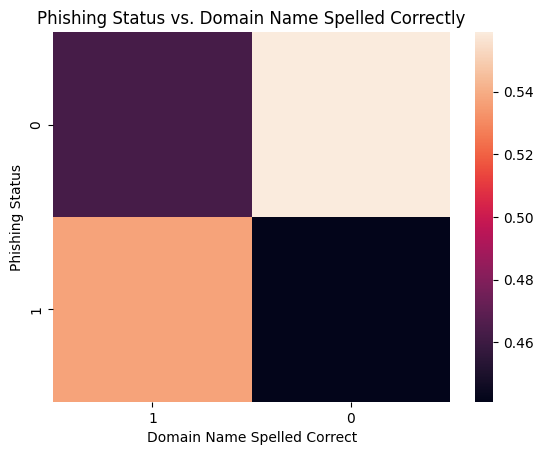

In [11]:
ax = plt.axes()
sns.heatmap(heatmap_dataset2, ax=ax).set(title='Phishing Status vs. Domain Name Spelled Correctly')
ax.set_ylabel("Phishing Status")
ax.set_xlabel("Domain Name Spelled Correct")

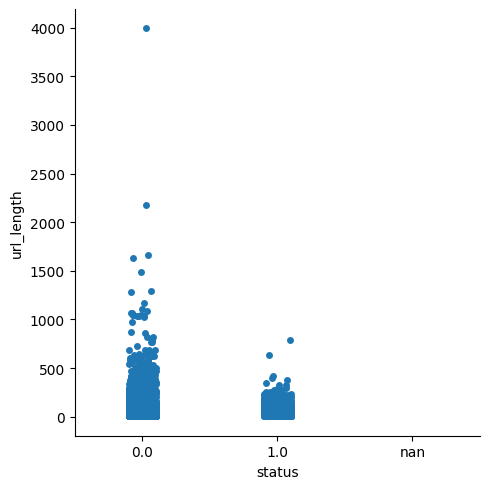

In [98]:
sns.catplot(data=df, x="status", y="url_length")

In [14]:
# use n_equals, n_and, url_length, n_period 

Observation made about counted old features: Underscores are not very useful for the analysis, because there are not any. Other attribues are just not going to be that useful, because there isn't enough of them in the dataset to be siginficant. Some of them being, questionmark, and Exclamation marks

In [25]:
df.columns

Index(['url', 'protocol', 'www_present', 'sub_domain', 'domain', 'top_domain',
       'dir', 'file', 'path', 'fragment', 'query', 'status', 'n_period',
       'n_hyphens', 'n_slash', 'n_equals', 'n_at', 'n_and', 'url_length',
       'domain_name_correct'],
      dtype='object')

In [29]:
# drop underscores, questonmark, and exclamation marks
# do a multi with the following features: sub_domain, top_domain, dir, file, path, fragment, query
heatmap_df = df.drop(columns=["url", "protocol", "www_present", "domain","domain_name_correct",
                                    "n_hyphens", "n_slash", "n_equals", "n_at", "n_and", "url_length", "n_period"])
heatmap_df

,sub_domain,top_domain,dir,file,path,fragment,query,status
0,1,1,0,0,1,0,0,0.0
1,1,1,0,0,1,0,0,0.0
2,1,1,0,0,0,0,0,0.0
3,0,1,0,0,0,0,0,0.0
4,1,1,0,1,1,0,1,0.0
...,...,...,...,...,...,...,...,...
99995,0,1,1,1,1,0,0,1.0
99996,0,1,1,1,1,0,0,1.0
99997,1,1,1,1,1,0,0,1.0
99998,0,1,1,0,1,0,0,1.0


In [16]:
# protocol, www_present, sub_domain, domain, top_domain, dir, file, path, fragment, query, and status
df["protocol"] = df["protocol"].notnull().astype('int')
df["www_present"] = df["www_present"].notnull().astype('int')
df["sub_domain"] = df["sub_domain"].notnull().astype('int')
df["domain"] = df["domain"].notnull().astype('int')
df["top_domain"] = df["top_domain"].notnull().astype('int')
df["dir"] = df["dir"].notnull().astype('int')
df["file"] = df["file"].notnull().astype('int')
df["path"] = df["path"].notnull().astype('int')
df["fragment"] = df["fragment"].notnull().astype('int')
df["query"] = df["query"].notnull().astype('int')

In [17]:
df

,url,protocol,www_present,sub_domain,domain,top_domain,dir,file,path,fragment,query,status,n_period,n_hyphens,n_slash,n_equals,n_at,n_and,url_length,domain_name_correct
0,https://ghfdc.knuodwq.cn/,1,0,1,1,1,0,0,1,0,0,0.0,2,0,3,0,0,0,25,1
1,https://rakutenluyaw.ouxawer-p.net/,1,0,1,1,1,0,0,1,0,0,0.0,2,1,3,0,0,0,35,1
2,pulsagratiss-1010.000webhostapp.com,0,0,1,1,1,0,0,0,0,0,0.0,2,1,0,0,0,0,35,1
3,idjvn.com,0,0,0,1,1,0,0,0,0,0,0.0,1,0,0,0,0,0,9,0
4,http://www.vmveg.com//vendor/phpunit/phpunit/s...,1,1,1,1,1,0,1,1,0,1,0.0,3,0,10,0,0,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,interceder.net/topic/Guy-Turcotte,0,0,0,1,1,1,1,1,0,0,1.0,1,1,2,0,0,0,33,1
99996,ifes.org/Divisions/List-Projects.aspx,0,0,0,1,1,1,1,1,0,0,1.0,2,1,2,0,0,0,37,0
99997,en.wikipedia.org/wiki/Jeffrey_Lynn,0,0,1,1,1,1,1,1,0,0,1.0,2,0,2,0,0,0,34,1
99998,ccdowney.com/bible-college/,0,0,0,1,1,1,0,1,0,0,1.0,1,1,2,0,0,0,27,1


In [91]:
# do a multi with the following features: sub_domain, top_domain, dir, file, path, fragment, query
# do a heatmap with domain_name_correct and status
# do a heatmap with www_present and status
heatmap_set = list()
for column, content in heatmap_df.iteritems():
    print(column)
    legit_df = df['status'] == 1
    phish_df = df['status'] == 0
    present = df[column] == 1
    not_present = df[column] == 0
    df_only_phish = df[~legit_df]
    df_only_legit = df[~phish_df]

    legit_not_present = len(df_only_legit[~present])
    legit_present = len(df_only_legit[~not_present])

    phish_not_present = len(df_only_phish[~present])
    phish_present = len(df_only_phish[~not_present])
    legit = [legit_present/(legit_present+phish_present), legit_not_present/(phish_not_present+legit_not_present)]
    phish = [phish_present/(legit_present+phish_present), phish_not_present/(phish_not_present+legit_not_present)]

    heat = pd.DataFrame(np.array([phish, legit]), columns=["present", "not_present"], index=["phishing", "legit"])
    heatmap_set.append(heat)

sub_domain
top_domain
dir
file
path
fragment
query
status


/tmp/ipykernel_2843279/4041175179.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, content in heatmap_df.iteritems():
/tmp/ipykernel_2843279/4041175179.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_not_present = len(df_only_legit[~present])
/tmp/ipykernel_2843279/4041175179.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_present = len(df_only_legit[~not_present])
/tmp/ipykernel_2843279/4041175179.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_not_present = len(df_only_phish[~present])
/tmp/ipykernel_2843279/4041175179.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phish_present = len(df_only_phish[~not_present])
/tmp/ipykernel_2843279/4041175179.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit_not_present = 

In [92]:
heatmap_set

[           present  not_present
 phishing  0.560185     0.440783
 legit     0.439815     0.559217,
            present  not_present
 phishing  0.486521     0.532723
 legit     0.513479     0.467277,
            present  not_present
 phishing  0.320388     0.655848
 legit     0.679612     0.344152,
            present  not_present
 phishing  0.307556     0.675696
 legit     0.692444     0.324304,
            present  not_present
 phishing  0.384722     0.924227
 legit     0.615278     0.075773,
            present  not_present
 phishing  0.605634      0.48783
 legit     0.394366      0.51217,
            present  not_present
 phishing  0.434471     0.493978
 legit     0.565529     0.506022,
            present  not_present
 phishing  0.026758     0.971954
 legit     0.973242     0.028046]

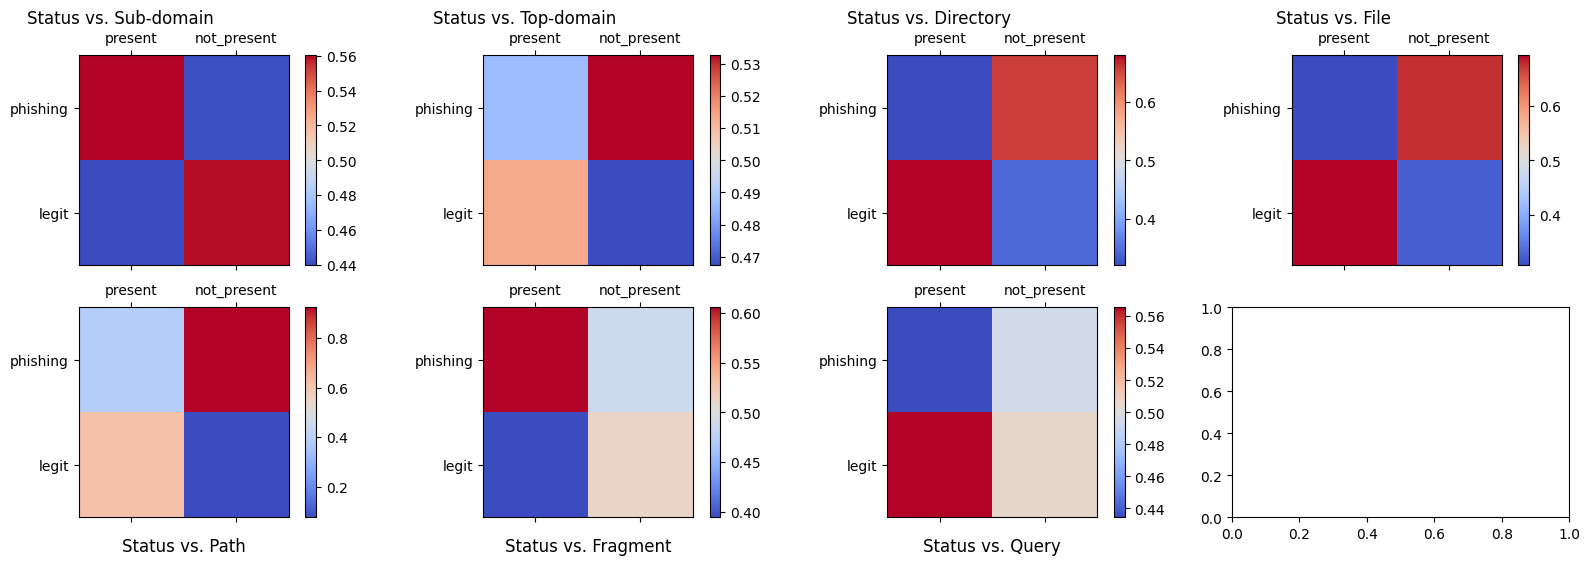

In [96]:
fig, axes = plt.subplots(2, 4, figsize=(20, 6))
im1 = axes[0][0].matshow(heatmap_set[0], cmap='coolwarm') 
fig.colorbar(im1, ax=axes[0][0])
axes[0][0].set_title("Status vs. Sub-domain", x=0.2)
axes[0][0].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[0][0].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])
#xes[0][0].xlabel("Sub-Domain")
# axes[0][0].ylabel("")

im1 = axes[0][1].matshow(heatmap_set[1], cmap='coolwarm') 
fig.colorbar(im1, ax=axes[0][1])
axes[0][1].set_title("Status vs. Top-domain", x=0.2)
axes[0][1].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[0][1].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

im2 = axes[0][2].matshow(heatmap_set[2], cmap='coolwarm') 
fig.colorbar(im2, ax=axes[0][2])
axes[0][2].set_title("Status vs. Directory", x=0.2)
axes[0][2].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[0][2].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

im3 = axes[0][3].matshow(heatmap_set[3], cmap='coolwarm') 
fig.colorbar(im3, ax=axes[0][3])
axes[0][3].set_title("Status vs. File", x=0.2)
axes[0][3].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[0][3].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

im4 = axes[1][0].matshow(heatmap_set[4], cmap='coolwarm') 
fig.colorbar(im4, ax=axes[1][0])
axes[1][0].set_title("Status vs. Path", y=-0.2)
axes[1][0].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[1][0].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

im5 = axes[1][1].matshow(heatmap_set[5], cmap='coolwarm') 
fig.colorbar(im5, ax=axes[1][1])
axes[1][1].set_title("Status vs. Fragment", y=-0.2)
axes[1][1].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[1][1].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

im6 = axes[1][2].matshow(heatmap_set[6], cmap='coolwarm') 
fig.colorbar(im6, ax=axes[1][2])
axes[1][2].set_title("Status vs. Query", y=-0.2)
axes[1][2].set_xticks(np.arange(len(["present", "not_present"])), labels=["present","not_present"])
axes[1][2].set_yticks(np.arange(len(["phishing", "legit"])), labels=["phishing", "legit"])

In [ ]:
# path, (add top-domain if need for features)

### Total Amount of Predicitve Features Based on Visulizations:
- path, n_equals, n_and, url_length, n_period, and domain_spelled_correctly